<a href="https://colab.research.google.com/github/narutaku0914/KIKAGAKU/blob/master/kikagaku_ML2class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分類

### 決定木

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris  # アヤメ

In [ ]:
# データセットの読み込み
dataset = load_iris()
columns_name = dataset.feature_names
x = dataset.data
t = dataset.target

In [ ]:
# データセットをDataFrameに変換
df = pd.DataFrame(data=x, columns=columns_name)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# t のユニークな値を確認
np.unique(t)

array([0, 1, 2])

目的変数 t には 3 種類の値が入っていることが分かりました。これは setosa,versicolor, virginica の文字列が数値に置き換えられている

In [ ]:
# データセットの分割
from sklearn.model_selection import  train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# モデルの検証
print('train score ', dtree.score(x_train, t_train))
print('test score ', dtree.score(x_test, t_test))

train score  1.0
test score  0.9777777777777777


回帰の時に使用した指標である決定係数ではない　<br>
分類の評価指標はいくつか種類がありますが、決定木の score() メソッドで表示される値には正解率 （Accuracy） が用いられている

もう一つの回帰との違いとして目的関数<br>
回帰では平均二乗誤差が用いられていたが、分類では交差エントロピーが主に用いられことも最初は用語として覚えておこう<br>
どちらの目的関数も正解と予測の差を評価したいという考えは同じです。

In [ ]:
# 推論
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

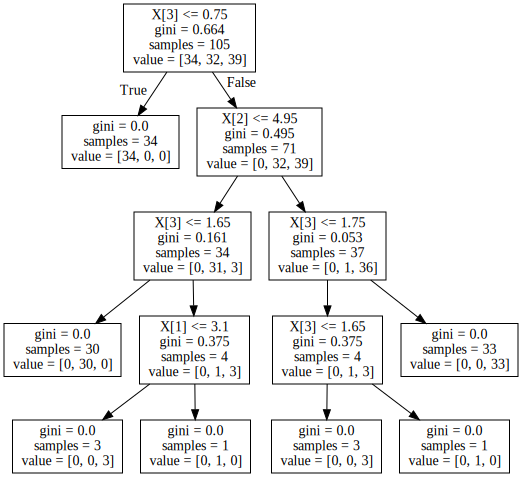

In [ ]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [ ]:
# feature importance
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

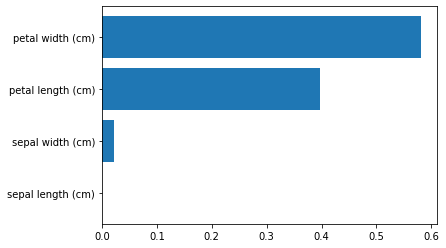

In [ ]:
# 可視化
y = columns_name
width = feature_importance

# 横向き表示
plt.barh(y=y, width=width)

petal width の影響度が高い

どの変数が結果に影響しているのかを求められることが多々あり便利

### SVM

In [ ]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC()

In [ ]:
# モデルの学習
svc.fit(x_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# モデルの検証
print('train score ', svc.score(x_train, t_train))
print('test score ', svc.score(x_test, t_test))

train score  0.9714285714285714
test score  0.9777777777777777


サポートベクトルマシンは一般的にデータに対して標準化を適用する必要があり → 今回のデータセットは全て cm を単位としているため、スケールが統一されており、標準化の必要は無し


In [ ]:
# 標準化
from sklearn.preprocessing import  StandardScaler
std_scaler = StandardScaler()

std_scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

# 平均&標準偏差
print(round(x_train_std.mean()))
print(round(x_train_std.std()))

0.0
1.0


In [ ]:
# 標準化後の学習
svc_std = SVC()

svc_std.fit(x_train_std, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# モデルの検証
print('train score ', svc.score(x_train, t_train))
print('test score ', svc.score(x_test, t_test))

print('train score scaling ', svc_std.score(x_train_std, t_train))
print('test score scaling ', svc_std.score(x_test_std, t_test))

train score  0.9714285714285714
test score  0.9777777777777777
train score scaling  0.9714285714285714
test score scaling  0.9777777777777777


スケールが統一されているため変化なし

### ロジスティック回帰

ロジスティック回帰 (Logistic regression) はあるデータがカテゴリに属する確率を予測するための回帰のアルゴリズムに該当

今回のように 3 クラス分類の問題設定ですと、クラス 0 を予測できる確率、クラス 1 を予測できる確率、クラス 2 を予測できる確率を出力 → 二値分類をクラス数だけ行っている<br>
最終的にそれぞれのクラスに対し確率を出力しているので、最も確率の高いクラスを予測値として採用

In [ ]:
# モデルの定義
from sklearn.linear_model  import LogisticRegression
log_reg = LogisticRegression(C=1.0)    # C(コストパラメータ) : 誤った予測に対するペナルティ。大きすぎると過学習になる


In [ ]:
# 学習
log_reg.fit(x_train, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# モデルの検証
print('train score ', log_reg.score(x_train, t_train))
print('test score ', log_reg.score(x_test, t_test))

train score  0.9809523809523809
test score  0.9777777777777777


In [ ]:
log_reg.coef_.shape

(3, 4)

In [ ]:
# 重み(係数)
log_reg.coef_

array([[-0.39765327,  0.8342231 , -2.28943702, -0.97842682],
       [ 0.5445833 , -0.29081813, -0.23264797, -0.65833762],
       [-0.14693003, -0.54340497,  2.52208499,  1.63676445]])

In [ ]:
# 切片
log_reg.intercept_

array([  8.99755733,   1.54386287, -10.5414202 ])

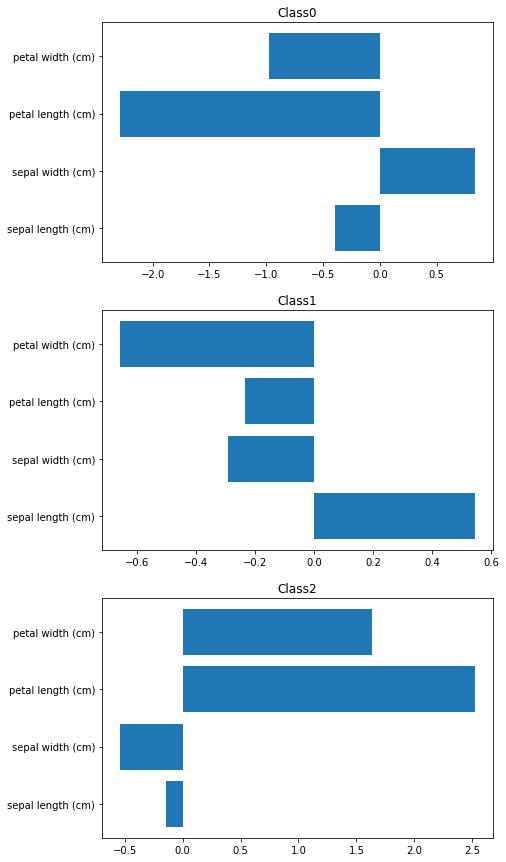

In [ ]:
# それぞれの重み
fig = plt.figure(figsize=(7,15))

for i in range(len(log_reg.coef_)):
  ax = fig.add_subplot(3,1,i+1)
  ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
  ax.set_title('Class{}'.format(i))

ビジネスの現場では、結果からどの特徴量が結果にどれくらい影響しているのかを定量評価したい<br>
ロジスティック回帰ではオッズ比を用いて、目的変数に対する各入力変数の影響の大きさを確認

「起こる確率 p」と「起こらない確率 (1-p)」の比をオッズ<br>
オッズ比とは、ある事象の 1 つの群と 1 つの群におけるオッズの比

オッズ比を求めるには重みwに対して、


\begin{aligned} &\exp(w) \end{aligned}
​
​​なぜこれになるかは、ロジスティック回帰のアルゴリズムから
​​

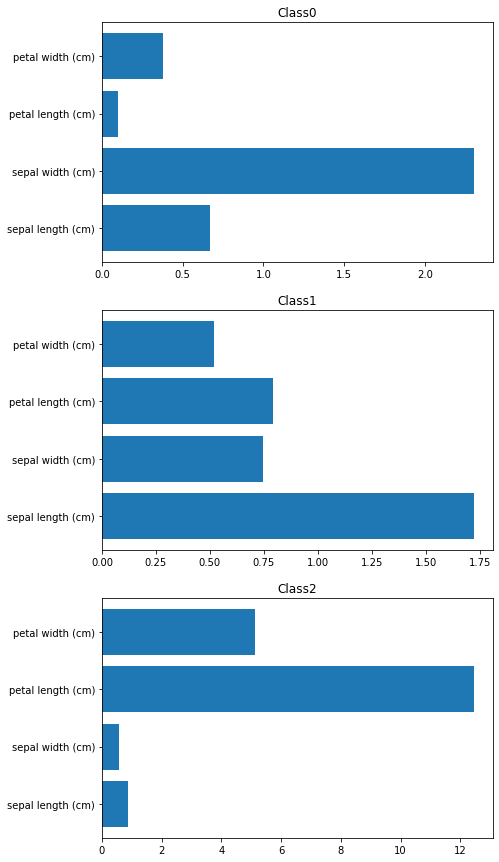

In [ ]:
# 各オッズ比を確認
fig = plt.figure(figsize=(7,15))

for i in range(len(log_reg.coef_)):
  ax = fig.add_subplot(3, 1, i+1)
  odds_ratio = np.exp(log_reg.coef_[i])
  ax.barh(y=dataset.feature_names, width=odds_ratio)
  ax.set_title('Class{}'.format(i))

In [ ]:
# class0
print('重み(係数)　', log_reg.coef_[0])
print('オッズ比　', np.exp(log_reg.coef_[0]))

重み(係数)　 [-0.39765327  0.8342231  -2.28943702 -0.97842682]
オッズ比　 [0.67189495 2.30302414 0.10132349 0.37590199]


入力変数と目的変数の関係性を捉えることができることもロジスティック回帰の大きな特徴

分類のアルゴリズムには確率を予測できるものと確率を予測できないものに分けれる<br>
分類器では前者を識別モデル、後者を識別関数



logisticは前者

In [ ]:
# 目標値の取得
log_reg.predict([x_test[0]])

array([2])

In [ ]:
# 各カテゴリに対する確率の確認
log_reg.predict_proba([x_test[0]])

array([[1.31706500e-04, 5.98487863e-02, 9.40019507e-01]])

カテゴリ2の確率が一番高い

# 分類の評価方法

Accuracy（正解率）

Precision（適合率）

Recall（再現率）

F1score（F 値）

TP (True Positive、真陽性)：を正例として、その予測が正しい場合の数

FP (False Positive、偽陽性)：予測値を正例として、その予測が誤りの場合の数

TN (True Negative、真陰性)：予測値を負例として、その予測が正しい場合の数

FN (False Negative、偽陰性)：予測値を負例として、その予測が誤りの場合の数

\begin{aligned} \frac{TP + TN}{TP+FP+TN+FN} &= \mathrm{Accuracy} \end{aligned}
​​

混合行列の斜めライン

\begin{aligned} \frac{TP}{TP+FP} &= \mathrm{Precision} \end{aligned}

混合行列の縦<br>
診断においては誤診を少なくしたいとき重視

\begin{aligned} \frac{TP}{TP+FN} &= \mathrm{Recall} \end{aligned}

横方向<br>
診断においては見逃しを避けたいとき重視

\begin{aligned} \frac{2・Recall・Precision}{Recall+Precision} &= \mathrm{F1score} \end{aligned}

Precision と Recall は互いにトレードオフの関係<br>
→ どちらかの指標を考慮しなければ、もう片方を 1 に近づけることができるので指標として少し極端な評価指標<br>
Precision と Recall の両者のバランスを取るために調和平均で計算

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving classification_imb.csv to classification_imb (1).csv


In [ ]:
df = pd.read_csv('classification_imb.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.2,-1.000000,10,1,-1,0,0,11,1,1,0,1,3,2,0.424264,1.048415,0.434971,3.464102,0.5,0.7,0.2,0.0,2.0,10.0,1.0,10.0,1.0,8.0,4.0,4.0,3.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,1,3,8,0,0,1,0,0,0,0,0,0,0,0,13,0,1,0,0.4,0.7,1.401116,10,1,-1,0,1,1,1,1,0,1,74,3,0.374166,0.716511,0.386135,3.162278,0.7,0.6,0.5,1.0,0.0,9.0,1.0,10.0,1.0,10.0,7.0,3.0,3.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,2,1,1,1,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.6,0.7,1.348610,6,1,-1,0,0,0,1,1,0,1,34,2,0.400000,0.804109,0.378021,3.316625,0.8,0.0,0.4,2.0,2.0,9.0,4.0,9.0,1.0,3.0,4.0,1.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,5,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.2,0.3,-1.000000,5,1,0,0,1,1,1,1,2,1,65,3,0.316228,0.393385,0.293258,0.000000,0.0,0.2,0.6,2.0,2.0,9.0,1.0,7.0,0.0,9.0,5.0,1.0,3.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,1,2,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.1,0.1,-1.000000,11,1,0,0,0,0,1,1,2,1,39,1,0.316070,0.622063,-1.000000,2.645751,0.5,0.8,0.9,2.0,2.0,9.0,4.0,9.0,1.0,7.0,4.0,0.0,3.0,6.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df = df.fillna(1) # NaNをすべて1
df.shape

(22277, 58)

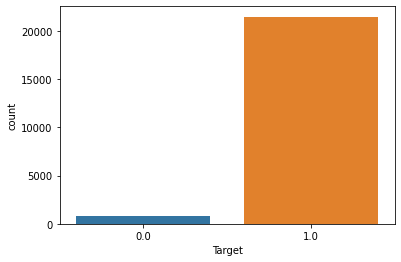

In [ ]:
sns.countplot(x='Target', data=df)

In [ ]:
# 入力変数と目的変数の切り分け
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(22277, 57) (22277,)


In [ ]:
# 学習用とテスト用の分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
# モデルの定義(logistic regression)
log_reg = LogisticRegression()

# 学習
log_reg.fit(x_train, t_train)

# 検証
print(log_reg.score(x_train, t_train))
print(log_reg.score(x_test, t_test))

0.9638940550246906
0.9640933572710951


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 推論
y_predict = log_reg.predict(x_test)

In [ ]:
# ユニークな値
np.unique(y_predict)

array([1.])

In [ ]:
np.unique(t_test, return_counts=True)

(array([0., 1.]), array([ 240, 6444]))

予測値はすべて1<br>
目標値はほぼ1 → とりあえずラベル1を予測しておけばAccuracyは高くなる

### 混合行列

In [ ]:
from sklearn import  metrics

In [ ]:
# ラベルの取り出し
labels = list(np.unique(t_train))
labels

[0.0, 1.0]

In [ ]:
# 混合行列の取得
confusion_matrix = metrics.confusion_matrix(t_test, y_predict)
confusion_matrix

array([[   0,  240],
       [   0, 6444]])

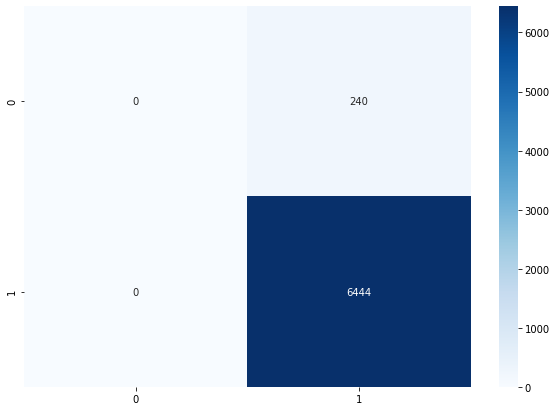

In [ ]:
# ヒートマップで可視化
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues')

In [ ]:
precision = metrics.precision_score(t_test, y_predict, average=None)
precision

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.96409336])

In [ ]:
recall = metrics.recall_score(t_test, y_predict, average=None)
recall

array([0., 1.])

In [ ]:
f1_score = metrics.f1_score(t_test, y_predict, average=None)
f1_score

array([0.        , 0.98171846])

上記の評価指標を一括でまとめて確認する際には metrics.precision_recall_fscore_support を使用します。

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


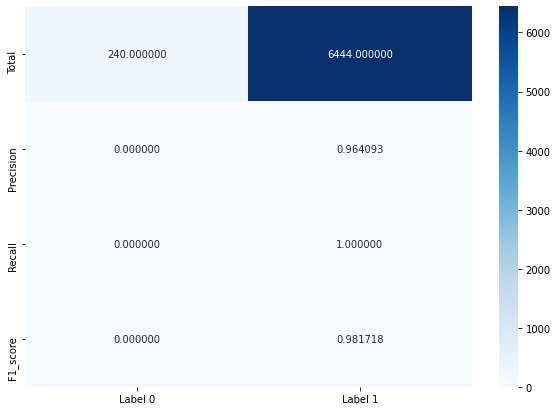

In [ ]:
recision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_predict)

# heatmap
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0', 'Label 1']
)
plt.figure(figsize=(10,7))
sns.heatmap(df_total, annot=True, fmt='.6f', cmap='Blues');

データの偏りなどに応じて評価指標を正しく選択し、評価を行うことが重要